In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import glob 
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files
from PIL import Image

In [5]:
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niafamelasmnjtk","key":"289ecbe4e61835c8d8fb819bf2f94cb2"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [8]:
!kaggle datasets download -d madisona/translated-animals10

 99% 582M/586M [00:05<00:00, 106MB/s] 
100% 586M/586M [00:05<00:00, 112MB/s]


In [9]:
!mkdir animals_dataset
!unzip -qq translated-animals10.zip -d animals_dataset
!ls animals_dataset

animals10


In [10]:
!ls animals_dataset/animals10/raw-img/

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [11]:
animals_dataset = os.path.join('/content/animals_dataset/animals10/raw-img/')
print(os.listdir(animals_dataset))

['cat', 'elephant', 'butterfly', 'squirrel', 'horse', 'spider', 'sheep', 'dog', 'cow', 'chicken']


In [12]:
ignore_animals_dataset = [ 'cat','butterfly', 'squirrel', 'horse', 'sheep', 'cow']

for x in ignore_animals_dataset:
  path = os.path.join(animals_dataset, x)
  shutil.rmtree(path)

In [13]:
list_animal = os.listdir(animals_dataset)
print(list_animal)

['elephant', 'spider', 'dog', 'chicken']


In [14]:
total_gambar = 0

for x in list_animal:
  dir = os.path.join(animals_dataset, x)
  list_gambar = len(os.listdir(dir))
  print(x +':', list_gambar)
  total_gambar = total_gambar + list_gambar
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('.',img.size)
  print('\n')

print('\nTotal Gambar :', total_gambar)

elephant: 1446
. (300, 200)
. (426, 640)
. (300, 300)
. (300, 224)


spider: 4821
. (640, 426)
. (200, 300)
. (300, 225)
. (300, 236)


dog: 4863
. (225, 300)
. (300, 225)
. (225, 300)
. (300, 300)


chicken: 3098
. (228, 300)
. (300, 200)
. (300, 225)
. (300, 225)



Total Gambar : 14228


In [15]:
validation_size = 0.2

training_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split= validation_size   
)

training_generator = training_datagen.flow_from_directory(animals_dataset,
                                                          batch_size=128,
                                                          class_mode='categorical',
                                                          target_size=(150, 150),
                                                          subset='training')
 
validation_generator = training_datagen.flow_from_directory(animals_dataset,
                                                              batch_size=128,
                                                              class_mode='categorical',
                                                              target_size=(150, 150),
                                                              subset='validation')

Found 11384 images belonging to 4 classes.
Found 2844 images belonging to 4 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      self.model.stop_training = True

callbacks = myCallback()

In [24]:
batch_size = 128
history = model.fit(training_generator, 
                    epochs = 20, 
                    steps_per_epoch = training_generator.samples / batch_size,
                    validation_steps = validation_generator.samples / batch_size,
                    validation_data = validation_generator, 
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/20
88/88 [==============================] - 909s 10s/step - loss: 1.2269 - accuracy: 0.4426 - val_loss: 1.2482 - val_accuracy: 0.4940
Epoch 2/20
88/88 [==============================] - 906s 10s/step - loss: 1.0027 - accuracy: 0.5878 - val_loss: 0.9856 - val_accuracy: 0.5865
Epoch 3/20
88/88 [==============================] - 895s 10s/step - loss: 0.8527 - accuracy: 0.6642 - val_loss: 0.7630 - val_accuracy: 0.7036
Epoch 4/20
88/88 [==============================] - 891s 10s/step - loss: 0.7213 - accuracy: 0.7278 - val_loss: 0.6126 - val_accuracy: 0.7655
Epoch 5/20
88/88 [==============================] - 890s 10s/step - loss: 0.6704 - accuracy: 0.7473 - val_loss: 0.5827 - val_accuracy: 0.7729
Epoch 6/20
88/88 [==============================] - 885s 10s/step - loss: 0.5928 - accuracy: 0.7805 - val_loss: 0.5329 - val_accuracy: 0.8024
Epoch 7/20
88/88 [==============================] - 891s 10s/step - loss: 0.5423 - accuracy: 0.7975 - val_loss: 0.4966 - val_accuracy: 0.8129
Epoch 

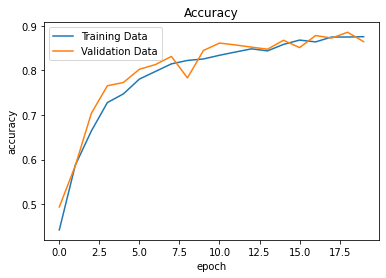

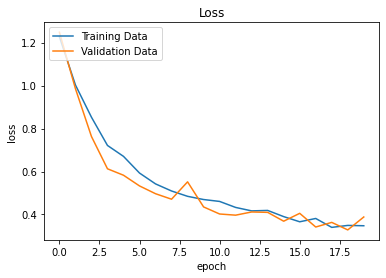

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left')
plt.show()

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)